In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, mean_absolute_error

In [2]:
lc = pd.read_csv("lc_dummy原始数据dummy后.csv")
lc.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'emp_length', 'annual return', 'annual_return_real',
       'annual_return_rate', 'annual_inc', 'verification_status', 'issue_d',
       'issue_year', 'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'fico_range_high', 'fico_range_low', 'fico_avg',
       'revol_bal', 'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default', 'B', 'C', 'D', 'E',
       'F', 'G', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [14]:
X = lc[['funded_amnt','int_rate','emp_length','annual_inc','issue_year', 'dti','open_acc','pub_rec'
       , 'fico_avg','revol_bal', 'revol_util','term_num','B', 'C', 'D', 'E','F', 'G', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card','debt_consolidation', 'educational', 'home_improvement'
       , 'house','major_purchase', 'medical', 'moving', 'other', 'renewable_energy','small_business', 'vacation', 'wedding']]
y = lc['return_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [15]:
#linear regression
x2=sm.add_constant(X_train)
est=sm.OLS(y_train,x2)  #OLS最小二乘法
est2=est.fit()
print(est2.summary())#线性回归

                            OLS Regression Results                            
Dep. Variable:             return_num   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     31.09
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          1.48e-204
Time:                        22:48:12   Log-Likelihood:                 23359.
No. Observations:               17483   AIC:                        -4.664e+04
Df Residuals:                   17446   BIC:                        -4.636e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.7658      0

In [16]:
#important features(p_values<0.05)
X2 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y2 = lc['return_num']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=3)

In [17]:
#linear regression
xt=sm.add_constant(X2_train)
est=sm.OLS(y2_train,xt)  #OLS最小二乘法
est2=est.fit()
print(est2.summary())#线性回归

                            OLS Regression Results                            
Dep. Variable:             return_num   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     100.7
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          6.23e-204
Time:                        22:48:17   Log-Likelihood:                 23305.
No. Observations:               17483   AIC:                        -4.659e+04
Df Residuals:                   17472   BIC:                        -4.650e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2454      0.649     25.019      0.0

In [19]:
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G','return_num']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

In [23]:
emp_length2=X1_test["emp_length"]*0.0005
annual_inc2=X1_test["annual_inc"]*(4.361e-08)
issue_year2=X1_test["issue_year"]*(-0.0080)
dti2=X1_test["dti"]*(-0.0003)
open_acc2=X1_test["open_acc"]*(-0.0003)
term_num2=X1_test["term_num"]*(-0.0003)
D1=X1_test["D"]*(-0.0075)
E1=X1_test["E"]*(-0.0114)
F1=X1_test["F"]*(-0.0194)
G1=X1_test["G"]*(-0.0220)
return_num2=X1_test["return_num"]

return_num_predict=emp_length2+annual_inc2+issue_year2+dti2+open_acc2+term_num2+D1+E1+F1+G1+16.2454
llc_linear_regression=pd.concat([emp_length2,annual_inc2,issue_year2,dti2,open_acc2,term_num2,D1,E1,F1,G1,return_num2,return_num_predict],axis=1)
llc_linear_regression.head()

,emp_length,annual_inc,issue_year,dti,open_acc,term_num,D,E,F,G,return_num,0
17360,0.0045,0.003053,-16.120,-0.001815,-0.0015,-0.0108,-0.0000,-0.0,-0.0000,-0.0,0.066295,0.118838
10661,0.0035,0.000872,-16.136,-0.006645,-0.0021,-0.0108,-0.0000,-0.0,-0.0000,-0.0,0.034340,0.094227
9317,0.0010,0.003271,-16.120,-0.003738,-0.0057,-0.0108,-0.0000,-0.0,-0.0000,-0.0,0.044112,0.109433
22469,0.0050,0.003140,-16.120,-0.008238,-0.0063,-0.0108,-0.0075,-0.0,-0.0000,-0.0,-0.027205,0.100702
18656,0.0050,0.003925,-16.112,-0.008361,-0.0054,-0.0180,-0.0000,-0.0,-0.0194,-0.0,-0.049468,0.091164


In [24]:
MAE_linear_regression = mean_absolute_error(y1_test,return_num_predict)
MAE_linear_regression

0.08067150139239442

In [26]:
############################ KNN

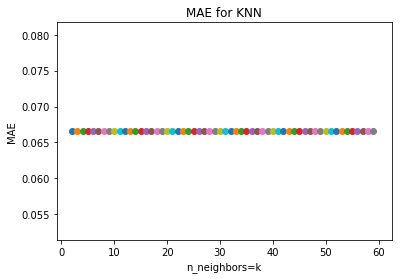

In [7]:
#KNN MAE
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

k_range = range(2,60)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1_train,y1_train.astype('int'))
    y_knn_scores = knn.predict(X1_test)
    MAE_knn = mean_absolute_error(y1_test,y_knn_scores)
    plt.scatter(k,MAE_knn)
plt.title('MAE for KNN')
plt.xlabel('n_neighbors=k')
plt.ylabel('MAE')
plt.show()

# Decision Tree######

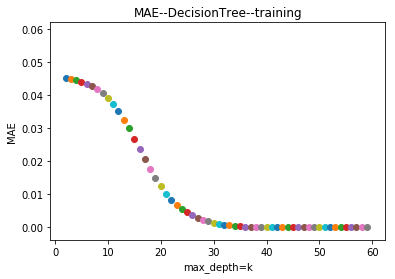

In [9]:
#decision tree MAE training set
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

k_range = range(2,60)
for k in k_range:
    lc3_model = DecisionTreeRegressor(max_depth=k,random_state=3)
    lc3_model.fit(X1_train,y1_train)
    y1_scores = lc3_model.predict(X1_train)
    MAE1 = mean_absolute_error(y1_train,y1_scores)
    plt.scatter(k,MAE1)
plt.title('MAE--DecisionTree--training')
plt.xlabel('max_depth=k')
plt.ylabel('MAE')
plt.show()

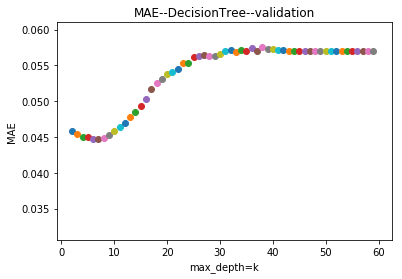

In [10]:
#decision tree MAE validation
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

k_range = range(2,60)
for k in k_range:
    lc3_model = DecisionTreeRegressor(max_depth=k,random_state=3)
    lc3_model.fit(X1_train,y1_train)
    y3_scores2 = lc3_model.predict(X1_test)
    MAE2 = mean_absolute_error(y1_test,y3_scores2)
    plt.scatter(k,MAE2)
plt.title('MAE--DecisionTree--validation')
plt.xlabel('max_depth=k')
plt.ylabel('MAE')
plt.show()

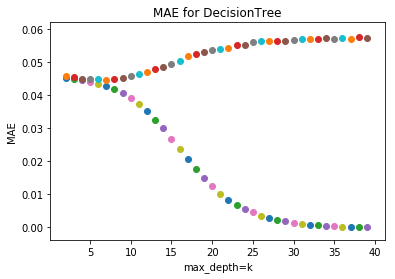

In [11]:
#decision tree MAE
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

k_range = range(2,40)
for k in k_range:
    lc3_model = DecisionTreeRegressor(max_depth=k,random_state=3)
    lc3_model.fit(X1_train,y1_train)
    y3_scores = lc3_model.predict(X1_train)
    MAE1 = mean_absolute_error(y1_train,y3_scores)
    y3_scores2 = lc3_model.predict(X1_test)
    MAE2 = mean_absolute_error(y1_test,y3_scores2)
    plt.scatter(k,MAE1)
    plt.scatter(k,MAE2)
plt.title('MAE for DecisionTree')
plt.xlabel('max_depth=k')
plt.ylabel('MAE')
plt.show()

In [22]:
#decision tree MAE
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

lc3_model = DecisionTreeRegressor(max_depth=8,random_state=3)
lc3_model.fit(X1_train,y1_train)
y3_scores2 = lc3_model.predict(X1_test)
MAE2 = mean_absolute_error(y1_test,y3_scores2)
MAE2

0.04484909333381416

# Decision Tree max_depth=8, MAE=0.04484909333381416

# RANDOM FOREST# 

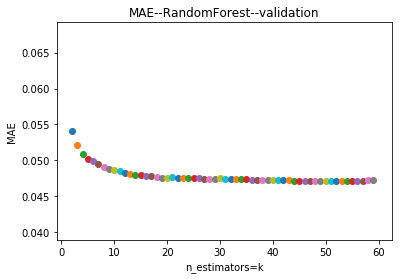

In [13]:
#random forest MAE
X1 = lc[['emp_length','annual_inc','issue_year', 'dti','open_acc','term_num', 'D', 'E','F', 'G']]
y1 = lc['return_num']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)

k_range = range(2,60)
for k in k_range:
    lc4_model = RandomForestRegressor(n_estimators=k,random_state=3)
    lc4_model.fit(X1_train,y1_train)
    y4_scores = lc4_model.predict(X1_test)
    MAE4 = mean_absolute_error(y1_test,y4_scores)
    plt.scatter(k,MAE4)
plt.title('MAE--RandomForest--validation')
plt.xlabel('n_estimators=k')
plt.ylabel('MAE')
plt.show()

0.046282648495848795
0.0466654694910626
0.046830414054398084
0.046803269079347024
0.04722119469563514
0.04723351530442648
0.04755225393222292
0.04738960947380735
0.04756931102377397


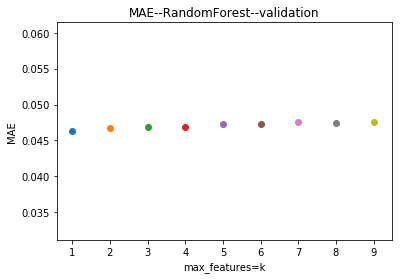

In [21]:
#random forest MAE
k_range = range(1,10)
for k in k_range:
    lc4_model = RandomForestRegressor(n_estimators=20,max_features=k,random_state=3)
    lc4_model.fit(X1_train,y1_train)
    y4_scores = lc4_model.predict(X1_test)
    MAE5 = mean_absolute_error(y1_test,y4_scores)
    print(MAE5)
    plt.scatter(k,MAE5)
plt.title('MAE--RandomForest--validation')
plt.xlabel('max_features=k')
plt.ylabel('MAE')
plt.show()

# RANDOM FOREST, n_estimators=20, max_features=1,  

MAE=0.046282648495848795